In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import os

test_dir = './data/test/single_face/'
train_dir = './data/face/'
test_processed_dir = './data/test/test_aligned/'
train_processed_dir = './data/face_aligned/'

os.listdir(test_dir)

In [ ]:
img = cv2.cvtColor(cv2.imread(test_dir + 'trump.jpg'), cv2.COLOR_BGR2RGB)
detector = MTCNN()
print(detector.detect_faces(img))
box = detector.detect_faces(img)[0]

In [ ]:
from keras.utils import load_img, img_to_array
from keras_vggface import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
#loaded
def crop_img(im,x,y,w,h):
    return im[y:(y+h),x:(x+w),:]

def detect_face(face_path):
    img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    box = detector.detect_faces(img)[0]
    return box

def detect_faces(face_path):
    #img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    img = load_img(face_path)
    img = img_to_array(img)
    box = detector.detect_faces(img)
    return box

def draw_box(face_path = './test/trump.jpg', plot = True):
    
    boxes = detect_faces(face_path)
    im = np.array(Image.open(face_path), dtype=np.uint8)
    
    if plot:
        # Create figure and axes
        num_box = len(boxes)
        fig,ax = plt.subplots(1, (1 + num_box))
        fig.set_size_inches(4 * (1 + num_box),4)
        # Display the image
        ax[0].imshow(im)
        ax[0].axis('off')
        # Create a Rectangle patch
        for idx, box in enumerate(boxes):
            box_x, box_y, box_w, box_h = box['box']
            rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1,edgecolor='r',facecolor='none')
            ax[0].add_patch(rect)
            ax[0].text(box_x, box_y, '{:3.2f}'.format(box['confidence']))
            for i in box['keypoints'].keys():
                circle = patches.Circle(box['keypoints'][i], radius = 5, color = 'red')
                ax[0].add_patch(circle)
            ax[1 + idx].imshow(crop_img(im, *box['box']))
            ax[1 + idx].axis('off')
        plt.show()
    
    res = [crop_img(im, *box['box']) for box in boxes]
    
    return res

1/1 [==============================] - 0s 404ms/step


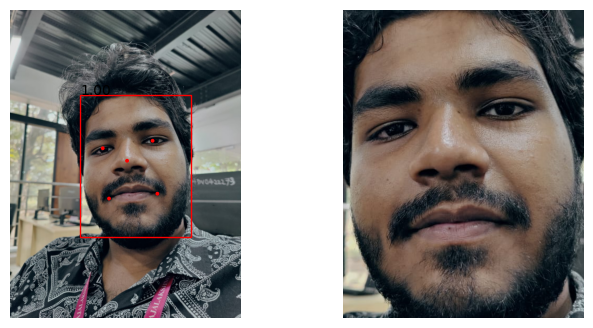

In [12]:
res = draw_box(test_dir + 'pal.jpg')

In [ ]:
for img in os.listdir(test_dir)[:-3]:
    draw_box(test_dir + img)

## Process Cropping For All test Faces

In [ ]:
from tqdm import tqdm
import shutil
if os.path.exists(test_processed_dir):
    shutil.rmtree(test_processed_dir)
os.mkdir(test_processed_dir)
for img in tqdm(os.listdir(test_dir)):
    box = detect_face(test_dir+img)
    im = plt.imread(test_dir+img)
    cropped = crop_img(im, *box['box'])
    plt.imsave(test_processed_dir+img, crop_img(im, *box['box']))

## Process Cropping For All train Faces

In [ ]:
def cut_negative_boundary(box):
    res = []
    for x in box['box']:
        if x < 0:
            x = 0
        res.append(x)
    box['box'] = res
    return box

In [ ]:
if os.path.exists(train_processed_dir):
    shutil.rmtree(train_processed_dir)
os.mkdir(train_processed_dir)

for img in tqdm(os.listdir(train_dir)):
    try:
        box = detect_face(train_dir+img)
        box = cut_negative_boundary(box)
        im = plt.imread(train_dir+img)
        cropped = crop_img(im, *box['box'])
        plt.imsave(train_processed_dir+img, cropped)
    except:
        print(img)
        continue